In [45]:
import pandas as pd

In [46]:
path = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"

In [47]:
data = pd.read_csv(path)

data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [48]:
data.drop(columns=[
  'CUST_ID',
  'TENURE'
], inplace=True)

data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [49]:
missing = data.isna().sum()

missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [50]:
data.fillna(
  data.median(),
  inplace=True
)

missing = data.isna().sum()

missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [51]:
from sklearn.preprocessing import Normalizer

In [52]:
norm = Normalizer()

In [53]:
values = norm.fit_transform(data.values)

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

In [56]:
y_pred = kmeans.fit_predict(values)

## Critérios de Validação
- Compactação
  - Quão próximos estão os pontos em um mesmo cluster
- Separação
  - Quão bem separados estão os pontos em clusters diferentes
- Coeficiente de Silhouette
  - $ S = \frac{b - a}{max(b, a)} $
  - $a$ é a distância média entre o ponto e todos os outros pontos do **mesmo cluster** (compactação)
  - $b$ é a distância média entre o ponto e todos os outros pontos do **cluster mais próximo** (separação)

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
labels = kmeans.labels_

In [59]:
silhouette = silhouette_score(values, labels, metric='euclidean')

silhouette

0.36451198422831005

### Índice Davies-Bouldin
$ DB = \frac{1}{k} \sum^{k}_{i=1} \underset{i\neq j}{max(R_{ij})} $

- $ R_{ij} = \frac{s_i + s_j}{d_{ij}} $
  - Medida de similaridade dos clusters $i$ e $j$, quanto menor o valor mais similares
  - $s$ similaridade dentro do cluster (Compactação)
    - distância média entre cada ponto do cluster e seu centroide
  - $d$ similaridade entre clusters (Separação)
    - distância entre centroides de clusters

In [60]:
from sklearn.metrics import davies_bouldin_score

In [61]:
dbs = davies_bouldin_score(values, labels)

dbs

1.0754963863506781

### Índice Calinki-Harabasz
$S = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E-k}{k-1}$
- $n_E$ é o número de elementos
- $k$ é o número de clusters
- $B_k = \sum^{k}_{q=1} n_q(c_q-c_E)(c_q-c_E)^T$ 
  - dispersão dos elementos entre (Between) clusters
  - $n_q$ número de elementos no cluster
  - $c_q$ centroide do clsuter
  - $c_e$ centroide dos elementos
- $W_k = \sum^{k}_{q=1} \sum_{x \in C_q} (x-c_q)(x-c_q)^T$
  - dispersão dos elementos dentro (Within) do cluster
  - $\sum_{x \in C_q} (x-c_q)(x-c_q)^T$ serve para estimar a matriz de Variância-Covariância

In [62]:
from sklearn.metrics import calinski_harabasz_score

In [63]:
chs = calinski_harabasz_score(values, labels)

chs

3431.7947670502294

## Comparando Resultados

In [64]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=73)
  labels = kmeans.fit_predict(dataset)

  ss  = silhouette_score(dataset, labels, metric='euclidean')
  dbs = davies_bouldin_score(dataset, labels)
  chs = calinski_harabasz_score(dataset, labels)

  return [ss, dbs, chs]

In [65]:
scores_values = []

for n in range(2, 15):
  scores_values.append(clustering_algorithm(n, values))

In [66]:
scores_values[0]

[0.29913992027435277, 1.5180867343147846, 3321.84635812273]

In [67]:
ss, dbs, chs = [], [], []

for i, j, k in scores_values:
  ss.append(i)
  dbs.append(j)
  chs.append(k)

In [68]:
import plotly.graph_objects as go

In [69]:
fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=list(range(2, 15)),
    y=ss
  )
)

fig.update_layout(
  dict(
    xaxis_title = 'Número de Clusters',
    yaxis_title = 'Média do Coeficiente de Silhueta'
  )
)

fig.show()

In [70]:
fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=list(range(2, 15)),
    y=dbs
  )
)

fig.update_layout(
  dict(
    xaxis_title = 'Número de Clusters',
    yaxis_title = 'Coeficiente de Davies-Bouldin'
  )
)

fig.show()

In [71]:
fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=list(range(2, 15)),
    y=chs
  )
)

fig.update_layout(
  dict(
    xaxis_title = 'Número de Clusters',
    yaxis_title = 'Coeficiente de Calinki-Harabasz'
  )
)

fig.show()

## Gerando conjunto aleatório para comparar

In [72]:
import numpy as np

In [73]:
data.shape

(8950, 16)

In [74]:
random_data = np.random.rand(*data.shape)

In [75]:
random_data.shape

(8950, 16)

In [76]:
clustering_algorithm(6, values)

[0.36485403763051477, 1.0451423716849007, 3523.5142406660693]

In [77]:
clustering_algorithm(6, random_data)

[0.03954543632588011, 3.35834172126998, 279.3900453600432]

O algoritmo se comporta melhor com os dados não aleatorios

### dividindo os valores em conjuntos

In [78]:
sets = np.array_split(values, 3)

In [79]:
for set in sets:
  print(clustering_algorithm(6, set))

[0.36417278939406283, 1.0229412794780184, 1192.3905525414714]
[0.30925018861865416, 1.2475598275343658, 1101.0581304599377]
[0.3722731225902909, 1.0413814578740697, 1184.7957505106758]


resultados similares para diferentes conjuntos

In [80]:
import matplotlib.pyplot as plt

In [81]:
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300, random_state=73)
kmeans.fit(values)

KMeans(n_clusters=6, random_state=73)

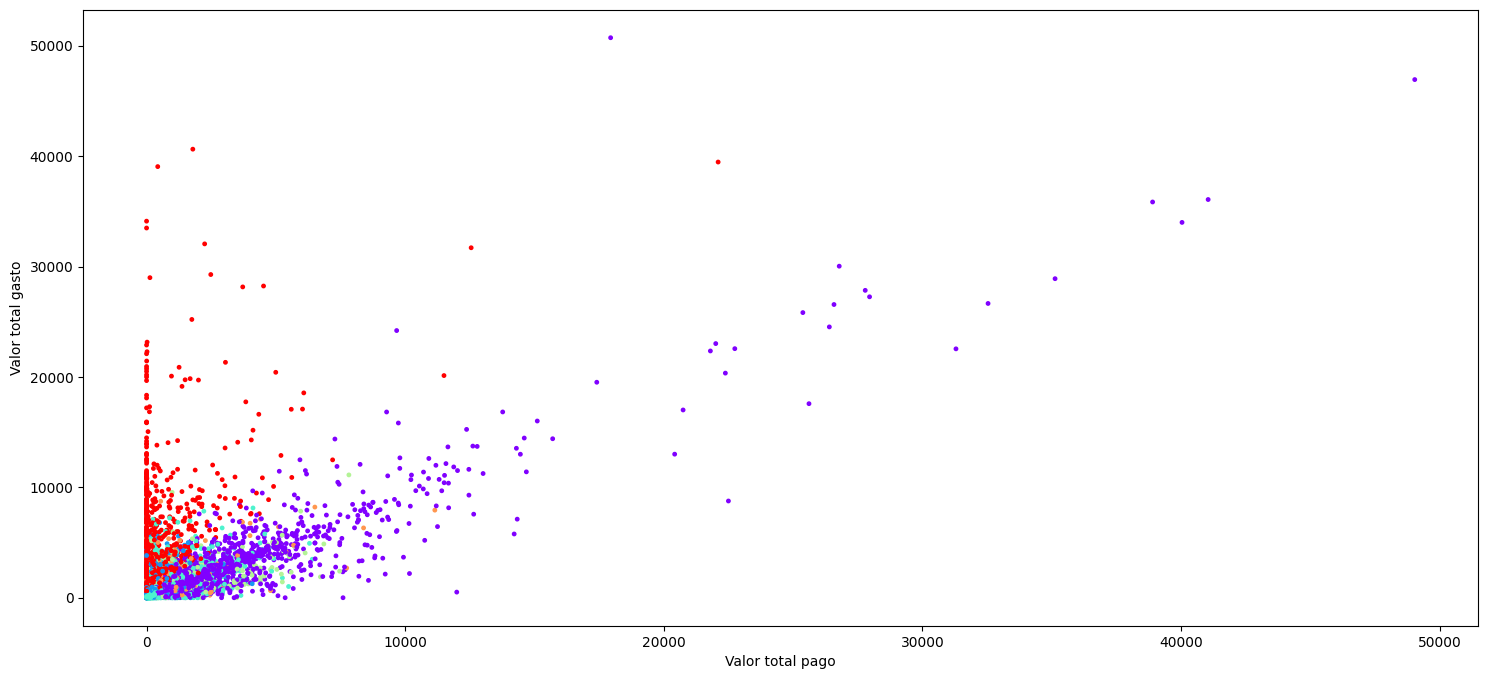

In [82]:
plt.figure(figsize=(18, 8))

plt.scatter(data['PURCHASES'], data['PAYMENTS'], c=kmeans.labels_, s=6, cmap='rainbow')

plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

plt.show()

In [83]:
import seaborn as sns

In [84]:
data['cluster'] = kmeans.labels_

In [ ]:
sns.pairplot(data, hue='cluster')

plt.show()

In [86]:
data.groupby("cluster").describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        1486.0  1118.416733  1649.518087    0.000000   208.787132   
1        1143.0  2429.889170  2032.506183    1.691842   945.019242   
2        3204.0   418.032017   797.242153    0.000000    22.858221   
3        1796.0  3242.269276  2630.347375  114.523682  1355.372679   
4         342.0  1959.062058  1816.549846   70.794108  1010.501276   
5         979.0  1767.343917  2002.934061    0.000000   498.274313   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         539.366142  1359.237898  19043.138560            1486.0  0.929514   
1        1845.210833  3327.567339  11581.933500            1143.0  0.892026   
2          79.389139   380.828477   7533.854422            3204.0  0.774292   
3        2268.945669  4490.172352  18495.558550            1796.0  0.998536   
4        1301.788287  2150.506925  11209.370760             342.0  0.987365   
5        1064.473728  2268.675458  14581.459140             979.0  0.856842   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       497.247095  18621.013310           1486.0  0.284290   
1        ...      1026.936888   8644.138069           1143.0  0.008869   
2        ...       238.873303   3933.230932           3204.0  0.252561   
3        ...      1464.078744   9642.502512           1796.0  0.000097   
4        ...      8172.035927  76406.207520            342.0  0.022729   
5        ...       891.640865  21235.065300            979.0  0.128703   

                                                           
              std  min  25%       50%       75%       max  
cluster                                                    
0        0.369454  0.0  0.0  0.083333  0.571429  1.000000  
1        0.044389  0.0  0.0  0.000000  0.000000  0.600000  
2        0.348802  0.0  0.0  0.000000  0.454545  1.000000  
3        0.002909  0.0  0.0  0.000000  0.000000  0.090909  
4        0.099126  0.0  0.0  0.000000  0.000000  1.000000  
5        0.197516  0.0  0.0  0.083333  0.166667  1.000000  

[6 rows x 128 columns]

In [87]:
centroids = kmeans.cluster_centers_

centroids

array([[1.54428975e-01, 2.44344464e-04, 4.43834726e-01, 2.60664385e-01,
        1.83347968e-01, 2.62724092e-02, 2.04773372e-04, 8.98570577e-05,
        1.50682023e-04, 9.46815959e-06, 1.73876943e-04, 6.18814123e-03,
        6.03024926e-01, 4.00711758e-01, 8.38707344e-02, 7.31821775e-05],
       [3.71230777e-01, 2.30637496e-04, 4.13552925e-02, 2.40132591e-02,
        1.73467336e-02, 5.01340843e-01, 4.76712104e-05, 1.62362612e-05,
        3.14865146e-05, 8.05809133e-05, 1.81925537e-03, 8.03149699e-04,
        7.07727462e-01, 1.51103804e-01, 1.31465001e-01, 2.40783987e-06],
       [6.52063823e-02, 2.31481221e-04, 1.22168481e-01, 4.79139373e-02,
        7.43571504e-02, 1.96870509e-02, 1.74943471e-04, 3.38245061e-05,
        1.42038868e-04, 7.31381498e-06, 1.14800474e-04, 2.89228997e-03,
        9.45434693e-01, 1.54765983e-01, 5.57922420e-02, 7.79532951e-05],
       [5.61584087e-01, 3.00573777e-04, 8.34661030e-02, 4.70383031e-02,
        3.64656297e-02, 1.04892194e-01, 8.71272668e-05, 3.315

A ideia é selecionar os atributos que diferenciem mais os centroides a partir da variancia, pois representarão uma característica melhor

In [96]:
max_attributes = centroids.shape[1]

for i in range(max_attributes):
  print(f"{data.columns[i]}: {centroids[:, i].var():5f}")

BALANCE: 0.025403
BALANCE_FREQUENCY: 0.000000
PURCHASES: 0.018329
ONEOFF_PURCHASES: 0.007018
INSTALLMENTS_PURCHASES: 0.003460
CASH_ADVANCE: 0.034527
PURCHASES_FREQUENCY: 0.000000
ONEOFF_PURCHASES_FREQUENCY: 0.000000
PURCHASES_INSTALLMENTS_FREQUENCY: 0.000000
CASH_ADVANCE_FREQUENCY: 0.000000
CASH_ADVANCE_TRX: 0.000000
PURCHASES_TRX: 0.000003
CREDIT_LIMIT: 0.034802
PAYMENTS: 0.029973
MINIMUM_PAYMENTS: 0.053885
PRC_FULL_PAYMENT: 0.000000


In [97]:
data.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1486.0,1118.416733,1649.518087,0.000000,208.787132,539.366142,1359.237898,19043.138560
1,1143.0,2429.889170,2032.506183,1.691842,945.019242,1845.210833,3327.567339,11581.933500
2,3204.0,418.032017,797.242153,0.000000,22.858221,79.389139,380.828477,7533.854422
3,1796.0,3242.269276,2630.347375,114.523682,1355.372679,2268.945669,4490.172352,18495.558550
4,342.0,1959.062058,1816.549846,70.794108,1010.501276,1301.788287,2150.506925,11209.370760
5,979.0,1767.343917,2002.934061,0.000000,498.274313,1064.473728,2268.675458,14581.459140


In [116]:
description = data.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients   = description.size()
description = description.mean()

description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
cluster,,,,,
0,1118.416733,3330.059495,185.882816,4111.615176,3052.726585
1,2429.889170,238.958031,3106.656278,4475.065617,974.996683
2,418.032017,628.675209,119.365970,5131.912225,817.038604
3,3242.269276,519.334337,762.755415,4418.179287,1052.052473
4,1959.062058,856.281725,451.824341,2198.684211,1339.886001
5,1767.343917,528.332615,3091.813329,3952.319931,5000.353036


In [117]:
n_clients

cluster
0    1486
1    1143
2    3204
3    1796
4     342
5     979
dtype: int64

In [118]:
description["n_clients"] = n_clients

In [119]:
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1118.416733,3330.059495,185.882816,4111.615176,3052.726585,1486
1,2429.889170,238.958031,3106.656278,4475.065617,974.996683,1143
2,418.032017,628.675209,119.365970,5131.912225,817.038604,3204
3,3242.269276,519.334337,762.755415,4418.179287,1052.052473,1796
4,1959.062058,856.281725,451.824341,2198.684211,1339.886001,342
5,1767.343917,528.332615,3091.813329,3952.319931,5000.353036,979


In [122]:
data.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1486.0,0.284290,0.369454,0.0,0.0,0.083333,0.571429,1.000000
1,1143.0,0.008869,0.044389,0.0,0.0,0.000000,0.000000,0.600000
2,3204.0,0.252561,0.348802,0.0,0.0,0.000000,0.454545,1.000000
3,1796.0,0.000097,0.002909,0.0,0.0,0.000000,0.000000,0.090909
4,342.0,0.022729,0.099126,0.0,0.0,0.000000,0.000000,1.000000
5,979.0,0.128703,0.197516,0.0,0.0,0.083333,0.166667,1.000000


## Análise dos clusters
 
### CLUSTER 0:
- Clientes com maiores valores em compras (PURCHASES).
- Clientes com baixos valores em saques (CASH_ADVANCE).
- Melhores Pagadores (PRC_FULL_PAYMENT).
- Quantidade média de clientes (n_clients).
### CLUSTER 1:
- Clientes com menores valores em compras (PURCHASES).
- Clientes com maiores valores em saques (CASH_ADVANCE).
- Baixa porcentagem de pagamento (PRC_FULL_PAYMENT).
- Quantidade média de clientes (n_clients).
### CLUSTER 2:
- Clientes com menores valores em gastos (BALANCE).
- Clientes com menores valores em saques (CASH_ADVANCE).
- Clientes com maiores valores em limites (CREDIT_LIMIT).
- Pagam bem (PRC_FULL_PAYMENT).
- Maior quantidade de clientes (n_clients).
### CLUSTER 3:
- Clientes com maiores valores em gastos (BALANCE).
- Piores pagadores (PRC_FULL_PAYMENT).
- Quantidade média de clientes (n_clients).
### CLUSTER 4:
- Clientes com menores valores em limites (CREDIT_LIMIT).
- Menor quantidade de clientes (n_clients).
### CLUSTER 5:
- Clientes com grandes valores em saques (CASH_ADVANCE).
- Baixa quantidade de clientes (n_clients).

## Conclusão
A partir da análise dos clusters é possível criar estratégias de negócios baseadas na necessidade da empresa (com teste AB).
- Aplicar estratégias em um grupo de teste
- Não aplicar estratégias em um grupo de controle